## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9532831	total: 58.5ms	remaining: 58.4s
1:	learn: 0.9355302	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9168964	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9018785	total: 61.5ms	remaining: 15.3s
4:	learn: 0.8867171	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8730995	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8566896	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8417684	total: 65.7ms	remaining: 8.15s
8:	learn: 0.8280612	total: 66.4ms	remaining: 7.32s
9:	learn: 0.8131032	total: 67.4ms	remaining: 6.67s
10:	learn: 0.7990506	total: 68.2ms	remaining: 6.13s
11:	learn: 0.7866699	total: 69ms	remaining: 5.68s
12:	learn: 0.7717493	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7584249	total: 71.3ms	remaining: 5.02s
14:	learn: 0.7467603	total: 72.1ms	remaining: 4.74s
15:	learn: 0.7334136	total: 72.9ms	remaining: 4.48s
16:	learn: 0.7228231	total: 73.7ms	remaining: 4.26s
17:	learn: 0.7111588	total: 74.5ms	remaining: 4.06s
18:	learn: 0.6998199	total: 75.3ms	remaining: 

56:	learn: 0.4361520	total: 108ms	remaining: 1.78s
57:	learn: 0.4315866	total: 109ms	remaining: 1.76s
58:	learn: 0.4279397	total: 109ms	remaining: 1.75s
59:	learn: 0.4236404	total: 110ms	remaining: 1.73s
60:	learn: 0.4198909	total: 111ms	remaining: 1.71s
61:	learn: 0.4167634	total: 112ms	remaining: 1.69s
62:	learn: 0.4122780	total: 114ms	remaining: 1.69s
63:	learn: 0.4085542	total: 114ms	remaining: 1.67s
64:	learn: 0.4058283	total: 115ms	remaining: 1.66s
65:	learn: 0.4029830	total: 116ms	remaining: 1.64s
66:	learn: 0.3991142	total: 117ms	remaining: 1.63s
67:	learn: 0.3962301	total: 118ms	remaining: 1.61s
68:	learn: 0.3927092	total: 118ms	remaining: 1.6s
69:	learn: 0.3898790	total: 119ms	remaining: 1.58s
70:	learn: 0.3859315	total: 120ms	remaining: 1.57s
71:	learn: 0.3820309	total: 121ms	remaining: 1.56s
72:	learn: 0.3797053	total: 123ms	remaining: 1.56s
73:	learn: 0.3762537	total: 124ms	remaining: 1.55s
74:	learn: 0.3732216	total: 124ms	remaining: 1.53s
75:	learn: 0.3703831	total: 125m

150:	learn: 0.2552030	total: 192ms	remaining: 1.08s
151:	learn: 0.2542872	total: 193ms	remaining: 1.08s
152:	learn: 0.2532478	total: 194ms	remaining: 1.07s
153:	learn: 0.2524520	total: 195ms	remaining: 1.07s
154:	learn: 0.2511728	total: 196ms	remaining: 1.07s
155:	learn: 0.2506409	total: 198ms	remaining: 1.07s
156:	learn: 0.2499249	total: 199ms	remaining: 1.06s
157:	learn: 0.2492934	total: 199ms	remaining: 1.06s
158:	learn: 0.2486467	total: 200ms	remaining: 1.06s
159:	learn: 0.2480389	total: 201ms	remaining: 1.05s
160:	learn: 0.2473355	total: 202ms	remaining: 1.05s
161:	learn: 0.2463876	total: 203ms	remaining: 1.05s
162:	learn: 0.2458209	total: 204ms	remaining: 1.04s
163:	learn: 0.2449731	total: 205ms	remaining: 1.04s
164:	learn: 0.2441799	total: 205ms	remaining: 1.04s
165:	learn: 0.2432525	total: 206ms	remaining: 1.03s
166:	learn: 0.2422143	total: 207ms	remaining: 1.03s
167:	learn: 0.2414563	total: 208ms	remaining: 1.03s
168:	learn: 0.2407939	total: 209ms	remaining: 1.03s
169:	learn: 

274:	learn: 0.1831008	total: 299ms	remaining: 788ms
275:	learn: 0.1826747	total: 300ms	remaining: 786ms
276:	learn: 0.1824708	total: 300ms	remaining: 784ms
277:	learn: 0.1818150	total: 301ms	remaining: 782ms
278:	learn: 0.1813741	total: 302ms	remaining: 781ms
279:	learn: 0.1811893	total: 304ms	remaining: 781ms
280:	learn: 0.1809897	total: 305ms	remaining: 780ms
281:	learn: 0.1805175	total: 305ms	remaining: 778ms
282:	learn: 0.1798302	total: 306ms	remaining: 776ms
283:	learn: 0.1792850	total: 307ms	remaining: 774ms
284:	learn: 0.1789174	total: 308ms	remaining: 772ms
285:	learn: 0.1783940	total: 309ms	remaining: 771ms
286:	learn: 0.1778397	total: 310ms	remaining: 769ms
287:	learn: 0.1773528	total: 311ms	remaining: 768ms
288:	learn: 0.1768686	total: 311ms	remaining: 766ms
289:	learn: 0.1767755	total: 312ms	remaining: 765ms
290:	learn: 0.1764498	total: 313ms	remaining: 763ms
291:	learn: 0.1762906	total: 314ms	remaining: 761ms
292:	learn: 0.1758118	total: 315ms	remaining: 760ms
293:	learn: 

361:	learn: 0.1542088	total: 374ms	remaining: 659ms
362:	learn: 0.1541651	total: 375ms	remaining: 657ms
363:	learn: 0.1539593	total: 375ms	remaining: 656ms
364:	learn: 0.1539273	total: 376ms	remaining: 654ms
365:	learn: 0.1538956	total: 377ms	remaining: 652ms
366:	learn: 0.1535092	total: 377ms	remaining: 651ms
367:	learn: 0.1533971	total: 378ms	remaining: 650ms
368:	learn: 0.1530158	total: 379ms	remaining: 648ms
369:	learn: 0.1528929	total: 380ms	remaining: 647ms
370:	learn: 0.1525298	total: 381ms	remaining: 646ms
371:	learn: 0.1522645	total: 382ms	remaining: 645ms
372:	learn: 0.1519181	total: 384ms	remaining: 645ms
373:	learn: 0.1515676	total: 384ms	remaining: 644ms
374:	learn: 0.1512585	total: 385ms	remaining: 642ms
375:	learn: 0.1512179	total: 386ms	remaining: 641ms
376:	learn: 0.1511121	total: 387ms	remaining: 640ms
377:	learn: 0.1506826	total: 388ms	remaining: 638ms
378:	learn: 0.1503544	total: 389ms	remaining: 637ms
379:	learn: 0.1501085	total: 389ms	remaining: 635ms
380:	learn: 

454:	learn: 0.1310390	total: 457ms	remaining: 548ms
455:	learn: 0.1306618	total: 458ms	remaining: 547ms
456:	learn: 0.1304448	total: 459ms	remaining: 546ms
457:	learn: 0.1301662	total: 460ms	remaining: 545ms
458:	learn: 0.1300785	total: 461ms	remaining: 543ms
459:	learn: 0.1298420	total: 462ms	remaining: 542ms
460:	learn: 0.1296806	total: 463ms	remaining: 541ms
461:	learn: 0.1293503	total: 464ms	remaining: 540ms
462:	learn: 0.1292424	total: 465ms	remaining: 539ms
463:	learn: 0.1290310	total: 466ms	remaining: 538ms
464:	learn: 0.1288503	total: 466ms	remaining: 537ms
465:	learn: 0.1285151	total: 467ms	remaining: 535ms
466:	learn: 0.1283188	total: 468ms	remaining: 534ms
467:	learn: 0.1280732	total: 469ms	remaining: 533ms
468:	learn: 0.1279274	total: 470ms	remaining: 532ms
469:	learn: 0.1277231	total: 471ms	remaining: 531ms
470:	learn: 0.1275522	total: 472ms	remaining: 530ms
471:	learn: 0.1274451	total: 473ms	remaining: 529ms
472:	learn: 0.1272315	total: 474ms	remaining: 528ms
473:	learn: 

559:	learn: 0.1095627	total: 548ms	remaining: 431ms
560:	learn: 0.1094242	total: 549ms	remaining: 430ms
561:	learn: 0.1092292	total: 550ms	remaining: 429ms
562:	learn: 0.1090767	total: 551ms	remaining: 428ms
563:	learn: 0.1090092	total: 552ms	remaining: 426ms
564:	learn: 0.1087595	total: 553ms	remaining: 425ms
565:	learn: 0.1086863	total: 553ms	remaining: 424ms
566:	learn: 0.1085877	total: 554ms	remaining: 423ms
567:	learn: 0.1084530	total: 555ms	remaining: 422ms
568:	learn: 0.1082977	total: 556ms	remaining: 421ms
569:	learn: 0.1081350	total: 557ms	remaining: 420ms
570:	learn: 0.1080761	total: 557ms	remaining: 419ms
571:	learn: 0.1079302	total: 558ms	remaining: 418ms
572:	learn: 0.1078298	total: 559ms	remaining: 417ms
573:	learn: 0.1075377	total: 560ms	remaining: 415ms
574:	learn: 0.1073306	total: 561ms	remaining: 414ms
575:	learn: 0.1070512	total: 561ms	remaining: 413ms
576:	learn: 0.1070217	total: 562ms	remaining: 412ms
577:	learn: 0.1067362	total: 563ms	remaining: 411ms
578:	learn: 

677:	learn: 0.0924430	total: 649ms	remaining: 308ms
678:	learn: 0.0922722	total: 650ms	remaining: 307ms
679:	learn: 0.0921776	total: 650ms	remaining: 306ms
680:	learn: 0.0919724	total: 651ms	remaining: 305ms
681:	learn: 0.0917971	total: 652ms	remaining: 304ms
682:	learn: 0.0917074	total: 653ms	remaining: 303ms
683:	learn: 0.0916731	total: 654ms	remaining: 302ms
684:	learn: 0.0916160	total: 655ms	remaining: 301ms
685:	learn: 0.0914884	total: 656ms	remaining: 300ms
686:	learn: 0.0914342	total: 656ms	remaining: 299ms
687:	learn: 0.0912808	total: 657ms	remaining: 298ms
688:	learn: 0.0912562	total: 658ms	remaining: 297ms
689:	learn: 0.0912356	total: 659ms	remaining: 296ms
690:	learn: 0.0911043	total: 660ms	remaining: 295ms
691:	learn: 0.0909756	total: 660ms	remaining: 294ms
692:	learn: 0.0908034	total: 661ms	remaining: 293ms
693:	learn: 0.0907521	total: 662ms	remaining: 292ms
694:	learn: 0.0905452	total: 663ms	remaining: 291ms
695:	learn: 0.0904185	total: 664ms	remaining: 290ms
696:	learn: 

785:	learn: 0.0788708	total: 739ms	remaining: 201ms
786:	learn: 0.0787709	total: 740ms	remaining: 200ms
787:	learn: 0.0786255	total: 741ms	remaining: 199ms
788:	learn: 0.0785692	total: 742ms	remaining: 198ms
789:	learn: 0.0784272	total: 743ms	remaining: 197ms
790:	learn: 0.0782732	total: 744ms	remaining: 196ms
791:	learn: 0.0780816	total: 744ms	remaining: 196ms
792:	learn: 0.0779882	total: 745ms	remaining: 195ms
793:	learn: 0.0778186	total: 746ms	remaining: 194ms
794:	learn: 0.0776618	total: 747ms	remaining: 193ms
795:	learn: 0.0775371	total: 748ms	remaining: 192ms
796:	learn: 0.0773727	total: 749ms	remaining: 191ms
797:	learn: 0.0772406	total: 750ms	remaining: 190ms
798:	learn: 0.0771191	total: 750ms	remaining: 189ms
799:	learn: 0.0769917	total: 751ms	remaining: 188ms
800:	learn: 0.0768773	total: 752ms	remaining: 187ms
801:	learn: 0.0767211	total: 753ms	remaining: 186ms
802:	learn: 0.0766368	total: 754ms	remaining: 185ms
803:	learn: 0.0764914	total: 755ms	remaining: 184ms
804:	learn: 

904:	learn: 0.0671496	total: 839ms	remaining: 88.1ms
905:	learn: 0.0670541	total: 840ms	remaining: 87.2ms
906:	learn: 0.0669089	total: 841ms	remaining: 86.2ms
907:	learn: 0.0667955	total: 842ms	remaining: 85.3ms
908:	learn: 0.0667227	total: 843ms	remaining: 84.4ms
909:	learn: 0.0666594	total: 844ms	remaining: 83.4ms
910:	learn: 0.0664948	total: 844ms	remaining: 82.5ms
911:	learn: 0.0664526	total: 845ms	remaining: 81.5ms
912:	learn: 0.0664118	total: 846ms	remaining: 80.6ms
913:	learn: 0.0663338	total: 847ms	remaining: 79.7ms
914:	learn: 0.0661418	total: 848ms	remaining: 78.7ms
915:	learn: 0.0660359	total: 849ms	remaining: 77.8ms
916:	learn: 0.0659606	total: 849ms	remaining: 76.9ms
917:	learn: 0.0658606	total: 850ms	remaining: 76ms
918:	learn: 0.0658452	total: 851ms	remaining: 75ms
919:	learn: 0.0657232	total: 852ms	remaining: 74.1ms
920:	learn: 0.0656126	total: 853ms	remaining: 73.2ms
921:	learn: 0.0654697	total: 854ms	remaining: 72.3ms
922:	learn: 0.0653635	total: 855ms	remaining: 71.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

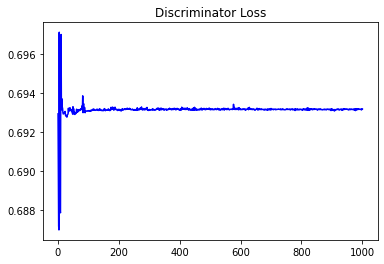

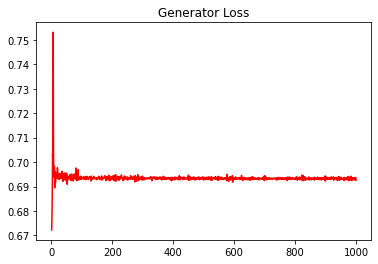

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10693867794974714


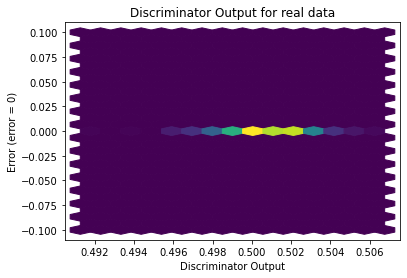

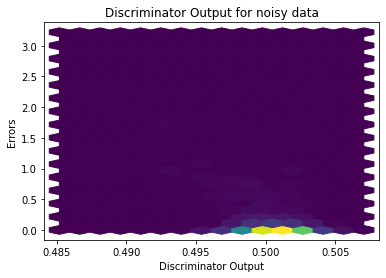

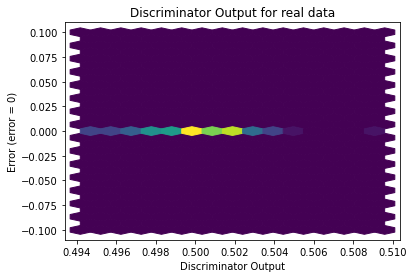

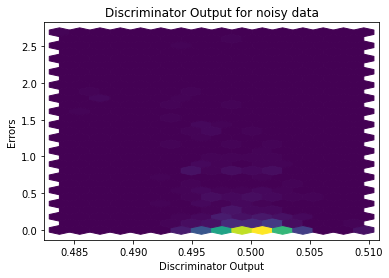

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


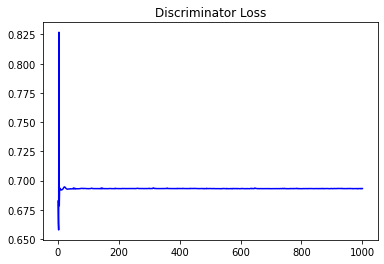

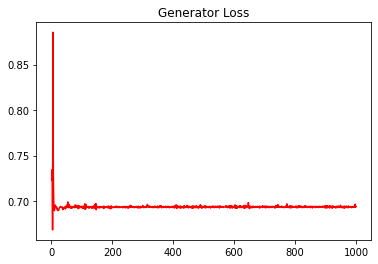

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09960878021334729


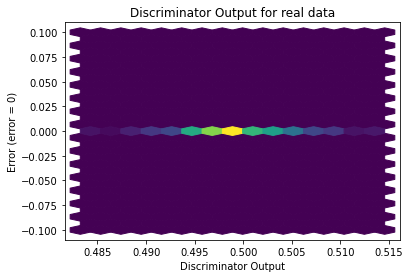

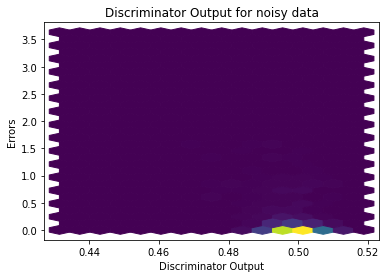

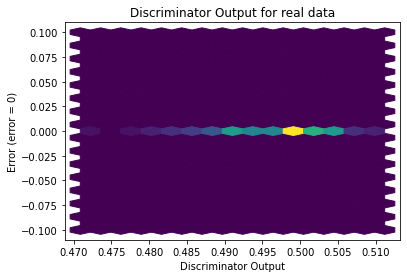

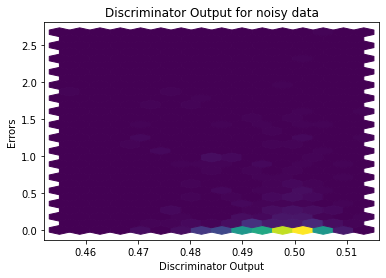

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1323]], requires_grad=True)
